<a href="https://colab.research.google.com/github/Kyrylo-Bakumenko/NFL_Gamba_And_Power_Rankings/blob/main/Copy_of_NFL_Historical_Elo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# season data: https://www.pro-football-reference.com/years/2019/games.htm

Season_Started = False
Start_Year = 2012
End_Year = 2020
simulation_count = 100
Max_Gain = 32

In [ ]:
def win_prob(player_elo, opponent_elo):
  return 1/(1+10**((-player_elo+opponent_elo)/400))

def elo_change(player_elo, opponent_elo, result):
  player_win_prob = win_prob(player_elo, opponent_elo)
  return (player_elo + Max_Gain*(result-player_win_prob))

In [ ]:
def get_season_names(start, end):
    seasons = ["Reference"]
    while start+1 < end:
      start+=1
      seasons.append(f'{start}')
    seasons.append(end)
    return seasons

In [ ]:
# import team name and abbreviation data
teams_abbr = pd.read_excel("/content/NFL_Season_Data.xlsx", sheet_name="TeamsABBR", header=0)
teams_abbr=teams_abbr.set_index("Franchise")
teams_abbr=teams_abbr.rename(columns={"Commonly Used Abbreviations": "Abbr"})
# set aside list of abbreviations
teams = teams_abbr["Abbr"].drop_duplicates().values
# create name to abbreviation dictionary
name_to_abbr = teams_abbr.to_dict()
name_to_abbr = name_to_abbr["Abbr"]
name_to_abbr;

In [ ]:
def create_season_list_by_years(Start_Year, End_Year):
  seasons = []
  for i in range(Start_Year, End_Year):
    try:
      seasons.append(pd.read_excel("/content/NFL_Season_Data.xlsx", sheet_name=str(i), header=0, usecols="B:F", index_col=0))
    except:
      break
  return seasons

In [ ]:
seasons = create_season_list_by_years(Start_Year, End_Year) # creates a list of 
# every season of nfl games from start year (inclusive) to end year (non-inclusive)

In [ ]:
def list_rename_dropna(seasons):
  for cur_season in seasons:
    # rename because we will check for draws
    cur_season.rename(columns={"Winner/tie": "Left", "Loser/tie": "Right"}, inplace=True)
    # remove nan's (artifacts from website)
    print("Pre NAN drop:", cur_season.shape)
    cur_season.dropna(inplace=True)
    print("Post NAN drop:", cur_season.shape)
    # bridge name changes by using consistent abbreviations
    cur_season["Left"]=cur_season["Left"].map(name_to_abbr).values
    cur_season["Right"]=cur_season["Right"].map(name_to_abbr).values
  return seasons

In [ ]:
seasons = list_rename_dropna(seasons) # does some reformating and na dropping

Pre NAN drop: (268, 4)
Post NAN drop: (267, 4)
Pre NAN drop: (268, 4)
Post NAN drop: (267, 4)
Pre NAN drop: (268, 4)
Post NAN drop: (267, 4)
Pre NAN drop: (268, 4)
Post NAN drop: (267, 4)
Pre NAN drop: (268, 4)
Post NAN drop: (267, 4)
Pre NAN drop: (268, 4)
Post NAN drop: (267, 4)
Pre NAN drop: (268, 4)
Post NAN drop: (267, 4)
Pre NAN drop: (268, 4)
Post NAN drop: (267, 4)


In [ ]:
teams # list out the 3-letter acronyms of NFL teams

array(['ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL',
       'DEN', 'DET', 'GB', 'HOU', 'IND', 'JAX', 'KC', 'LV', 'LAC', 'LAR',
       'MIA', 'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'PHI', 'PIT', 'SF', 'SEA',
       'TB', 'TEN', 'WAS'], dtype=object)

In [ ]:
# if no elo rankings have been done, make 1000
if not Season_Started:
  Elo = dict(zip(teams, np.full(shape=teams.shape[0], fill_value=1000)))

In [ ]:
Elo
Elo_historical = []

In [ ]:
for cur_season in seasons:
  for i in range(len(cur_season)):
      if (i == 0) or (i % 16==0):
        Elo_historical.append(pd.Series(Elo))
      # determine if left or right won, check scores
      #   0     1     2    3
      # Left	Right	Pts	Pts.1
      left = cur_season.iloc[i, 0]
      right = cur_season.iloc[i, 1]
      if cur_season.iloc[i, 2] > cur_season.iloc[i, 3]:
        # left wins
        try:
          Elo.update({
              left: elo_change(Elo[left], Elo[right], 1),
              right: elo_change(Elo[right], Elo[left], 0)
          })
        except:
          print("Failed: ", left, right, "Season: ", cur_season.head(5), "Date: ", cur_season.index.values[i])
      elif cur_season.iloc[i, 2] < cur_season.iloc[i, 3]:
        # right wins
        Elo.update({
            left: elo_change(Elo[left], Elo[right], 0),
            right: elo_change(Elo[right], Elo[left], 1)
        })
      else:
        # draw
        Elo.update({
            left: elo_change(Elo[left], Elo[right], 0.5),
            right: elo_change(Elo[right], Elo[left], 0.5)
        })


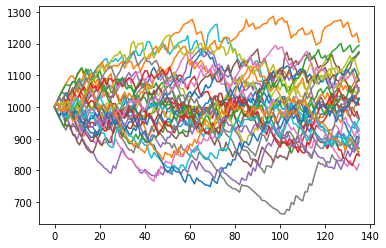

In [ ]:
plt.plot(Elo_historical);

In [ ]:
get_season_names(Start_Year, End_Year)

['Reference', '2013', '2014', '2015', '2016', '2017', '2018', '2019', 2020]

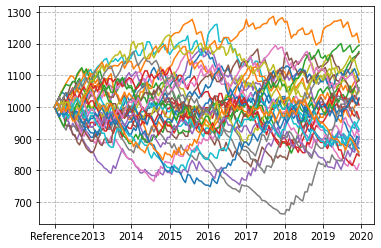

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1)

ax.plot(Elo_historical)
ax.minorticks_off()
plt.xticks(range(0, len(Elo_historical)+1, int(len(Elo_historical)/(End_Year-Start_Year))),
              # get_season_names(Start_Year, End_Year))
              labels=get_season_names(Start_Year, End_Year))

ax.grid(linestyle='--')
# plt.legend(handles=[teams])

plt.show()

In [ ]:
Elo_historical_pd = pd.DataFrame(Elo_historical)
Elo_historical_pd

,ARI,ATL,BAL,BUF,CAR,CHI,CIN,CLE,DAL,DEN,DET,GB,HOU,IND,JAX,KC,LV,LAC,LAR,MIA,MIN,NE,NO,NYG,NYJ,PHI,PIT,SF,SEA,TB,TEN,WAS
0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
1,1016.000000,1016.000000,1016.000000,984.000000,984.000000,1016.000000,984.000000,984.000000,1016.000000,1016.000000,1016.000000,984.000000,1016.000000,984.000000,984.000000,984.000000,984.000000,1016.000000,984.000000,984.000000,1016.000000,1016.000000,984.000000,984.000000,1016.000000,1016.000000,984.000000,1016.000000,984.000000,1016.000000,984.000000,1016.000000
2,1032.000000,1032.000000,1000.000000,1000.000000,1000.000000,998.530498,1000.000000,968.000000,998.530498,1000.000000,1000.000000,1001.469502,1030.530498,1001.469502,969.469502,968.000000,968.000000,1030.530498,1001.469502,1000.000000,998.530498,1000.000000,968.000000,1001.469502,998.530498,1032.000000,1001.469502,1032.000000,1001.469502,998.530498,969.469502,998.530498
3,1048.000000,1047.932327,1016.000000,1014.530498,984.067673,1014.665841,1015.932327,953.469502,1014.530498,985.402374,982.597626,985.469502,1045.128125,984.000000,986.939003,984.000000,985.536577,1014.598171,985.334159,983.932327,1016.067076,984.000000,952.000000,1017.401829,1014.598171,1016.000000,983.932924,1014.463423,1017.469502,982.530498,986.871875,982.598171
4,1042.423893,1061.023935,1029.151059,997.128125,970.976065,1030.659609,1030.600226,940.318443,998.536731,1001.408554,968.134201,999.932924,1058.470188,984.000000,972.271104,969.405466,969.530397,1029.192705,1021.468515,970.849759,1030.530501,1001.402374,937.536577,1001.337273,998.591966,1032.064556,983.932924,1030.469628,999.993820,966.533615,973.529812,998.595055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,871.257470,966.825868,1142.263146,1027.642413,968.402870,1011.076110,831.419117,876.954848,1052.413151,917.618821,913.042270,1056.766216,1066.839345,998.520373,873.132966,1122.730508,936.928523,988.448017,1100.355547,901.276330,1102.061891,1243.287888,1195.175878,822.248333,843.689567,1046.034837,1099.741754,1016.409452,1161.823900,919.827085,1022.251769,903.533736
132,864.486021,982.898491,1153.168180,1016.737379,952.330247,1028.970819,817.504190,890.869775,1034.518442,940.097157,904.978937,1066.134137,1044.361009,978.957139,862.256647,1144.069792,924.780673,999.324337,1119.157100,882.648383,1110.125225,1221.948604,1171.600388,815.331390,862.317514,1052.951780,1106.513203,1039.984942,1143.022347,939.390319,1034.399619,894.165814
133,881.698708,1001.504014,1158.219558,1036.782087,944.324844,1014.675756,814.662055,873.657089,1054.340879,932.541838,890.558478,1080.429200,1059.902395,971.018967,881.105300,1151.625111,905.932020,988.260682,1099.334663,863.586540,1121.188880,1224.790739,1179.538560,834.393233,857.266136,1062.109307,1086.468494,1021.379419,1151.027750,953.810778,1018.858232,885.008287
134,908.097715,1012.171224,1163.426835,1028.683602,929.551741,1004.674976,800.900336,868.449812,1038.698569,946.617789,876.482528,1098.297689,1071.163090,985.792070,870.438089,1161.625891,925.653991,968.538711,1079.803747,877.348259,1103.320392,1232.889224,1188.624970,852.707791,882.516728,1077.751617,1061.217902,1040.910336,1124.628742,942.550084,1009.771822,866.693729


Enter team ABRV: WAS


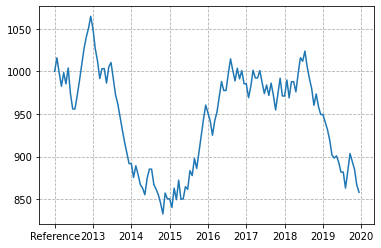

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1)

acr = input("Enter team ABRV: ")
ax.plot(Elo_historical_pd[acr])
ax.minorticks_off()
plt.xticks(range(0, len(Elo_historical)+1, int(len(Elo_historical)/(End_Year-Start_Year))),
              # get_season_names(Start_Year, End_Year))
              labels=get_season_names(Start_Year, End_Year))

ax.grid(linestyle='--')
# plt.legend(handles=[teams])

plt.show()

In [ ]:
Elo;

In [ ]:
### set up predict method ###
# 256 games in regular season pre 2021
def predict_season_standings_static(Elo, cur_season):
  pred_table = pd.DataFrame(teams)
  pred_table["Wins"]=0
  pred_table.rename(columns={0: "Team"}, inplace=True)
  pred_table.set_index("Team", inplace=True)
  sim_table = pred_table
  for sim in range(simulation_count):
    pred_table["Wins"]=0
    for i in range(256):
        # determine if left or right won, check scores
        #   0     1     2    3
        # Left	Right	Pts	Pts.1
        left = cur_season.iloc[i, 0]
        right = cur_season.iloc[i, 1]
        # win_prob is the probability the "left" player wins.
        # If the random number simulated is less than win_prob,
        # this even is considered true, otherwise "right" wins.
        rand = np.random.uniform()
        if rand < win_prob(Elo[left], Elo[right]):
          # left wins
          pred_table.loc[left, "Wins"] = pred_table.loc[left, "Wins"]+1

        elif rand > win_prob(Elo[left], Elo[right]):
          # right wins
          pred_table.loc[right, "Wins"] = pred_table.loc[right, "Wins"]+1
        else:
          # draw
          pred_table.loc[left, "Wins"] = pred_table.loc[left, "Wins"]+0.5
          pred_table.loc[right, "Wins"] = pred_table.loc[right, "Wins"]+0.5
    sim_table = sim_table + pred_table
  sim_table = sim_table/simulation_count
  return sim_table.rename(columns={"Wins": "Stat_Wins"})


In [ ]:
### considers the elo change of its own predicted outcomes ###
def predict_season_standings_dynamic(Elo, cur_season):
  pred_table = pd.DataFrame(teams)
  pred_table["Wins"]=0
  pred_table.rename(columns={0: "Team"}, inplace=True)
  pred_table.set_index("Team", inplace=True)
  sim_table = pred_table
  for sim in range(simulation_count):
    pred_table["Wins"]=0
    for i in range(256):
      # determine if left or right won, check scores
      #   0     1     2    3
      # Left	Right	Pts	Pts.1
      left = cur_season.iloc[i, 0]
      right = cur_season.iloc[i, 1]
      # win_prob is the probability the "left" player wins.
      # If the random number simulated is less than win_prob,
      # this even is considered true, otherwise "right" wins.
      rand = np.random.uniform()
      if rand < win_prob(Elo[left], Elo[right]):
        # left wins
        pred_table.loc[left, "Wins"] = pred_table.loc[left, "Wins"]+1
        Elo.update({
            left: elo_change(Elo[left], Elo[right], 1),
            right: elo_change(Elo[right], Elo[left], 0)
        })

      elif rand > win_prob(Elo[left], Elo[right]):
        # right wins
        pred_table.loc[right, "Wins"] = pred_table.loc[right, "Wins"]+1
        Elo.update({
            left: elo_change(Elo[left], Elo[right], 0),
            right: elo_change(Elo[right], Elo[left], 1)
        })
      else:
        # draw
        pred_table.loc[left, "Wins"] = pred_table.loc[left, "Wins"]+0.5
        pred_table.loc[right, "Wins"] = pred_table.loc[right, "Wins"]+0.5
        Elo.update({
          left: elo_change(Elo[left], Elo[right], 0.5),
          right: elo_change(Elo[right], Elo[left], 0.5)
        })
    # print(pred_table.max(axis = 0))
    sim_table = sim_table + pred_table
  sim_table = sim_table/simulation_count
  return sim_table.rename(columns={"Wins": "Dyn_Wins"})

In [ ]:
static_wins = predict_season_standings_static(Elo, seasons[len(seasons)-1])
dynamic_wins = predict_season_standings_dynamic(Elo, seasons[len(seasons)-1])
pred_wins = pd.concat([static_wins, dynamic_wins], axis=1)

In [ ]:
pred_wins = pred_wins*(256/pred_wins.sum()) # ????????

In [ ]:
# pred_wins.sum() # it is 256 as expected

In [ ]:
pred_wins # print predicted wins for 2020 season

,Stat_Wins,Dyn_Wins
Team,,
ARI,5.663366,3.534653
ATL,8.039604,4.752475
BAL,11.326733,11.534653
BUF,8.277228,10.396040
CAR,5.732673,2.891089
CHI,8.386139,5.435644
CIN,4.079208,5.712871
CLE,4.970297,5.811881
DAL,9.099010,4.801980


In [ ]:
# import moneyline betting data for 2020-21 season
game_bets = pd.read_excel("/content/NFL_Odds_2020-21.xls", sheet_name="Sheet1", header=0, usecols="D, I, L")#, index_col=0)

In [ ]:
# convert ML into effective odds bookies are estimating
game_bets["Bookies Odds"] = 0

for row in range(game_bets["ML"].size):
  ML = game_bets["ML"][row]
  if ML > 0: # positive - udnerdog
    game_bets.iloc[row, 3] = 100/(ML+100)
  else: # negative - favorite
    game_bets.iloc[row, 3] = abs(ML)/(abs(ML)+100)


In [ ]:
game_bets # print betting info for every team and every match on specified season (2020)

,Team,Final,ML,Bookies Odds
0,HOU,20,375,0.210526
1,KC,34,-450,0.818182
2,MIA,11,290,0.256410
3,NE,21,-350,0.777778
4,CLE,6,270,0.270270
...,...,...,...,...
533,GB,26,-180,0.642857
534,BUF,24,140,0.416667
535,KC,38,-160,0.615385
536,KC,9,-150,0.600000


In [ ]:
tt_season = create_season_list_by_years(Start_Year=2020, End_Year=2021)
tt_season = list_rename_dropna(tt_season)[0]
print('Num Rows: ', len(tt_season))
tt_season

Pre NAN drop: (270, 4)
Post NAN drop: (269, 4)
Num Rows:  269


,Left,Right,Pts,Pts.1
Date,,,,
2020-09-10,KC,HOU,34.0,20.0
2020-09-13,SEA,ATL,38.0,25.0
2020-09-13,BUF,NYJ,27.0,17.0
2020-09-13,WAS,PHI,27.0,17.0
2020-09-13,GB,MIN,43.0,34.0
...,...,...,...,...
2021-01-17,KC,CLE,22.0,17.0
2021-01-17,TB,NO,30.0,20.0
2021-01-24,TB,GB,31.0,26.0


In [ ]:
def find_index_of_team_game(ABR, matches_played, game_bets):
  i=0
  idx = game_bets.loc[game_bets.Team==ABR].index[0]
  while idx < 2*matches_played:
    i+=1
    idx = game_bets.loc[game_bets.Team==ABR].index[i]
  return idx

In [ ]:
### considers the elo change of its own predicted outcomes before predicting every bet ###
def predict_season_standings_dynamic_bets(Elo, cur_season, game_bets):
  bets_taken_table = cur_season.iloc[0:0]
  bets_taken_table["Winner"] = "n/a"
  bets_taken_table["Bookies Odds"] = 0
  bets_taken_table["Our Odds"] = 0
  bets_taken_table["Correct"] = True
  print(bets_taken_table)

  for i in range(len(cur_season)): # every game in cur_season
    # determine if left or right won, check scores
    #   0     1     2    3
    # Left	Right	Pts	Pts.1
    left = cur_season.iloc[i, 0]
    right = cur_season.iloc[i, 1]

    # odds left wins according to elo model
    left_win_prob = win_prob(Elo[left], Elo[right])
    # odds right wins according to elo model
    right_win_prob = 1-left_win_prob

    # index of left team
    try:
      idx = find_index_of_team_game(left, i, game_bets)
    except:
      print("left", left, i)
    # find bookies odds
    BO = game_bets.loc[idx, "Bookies Odds"]
    # if model winchance is greater than bookies, add to bets_taken_table
    if left_win_prob > BO:

      row = cur_season.iloc[i]
      if cur_season.iloc[i, 2] > cur_season.iloc[i, 3]:
        row.loc["Winner"] = left
      else:
        row.loc["Winner"] = right
      row.loc["Bookies Odds"] = game_bets.loc[idx, "Bookies Odds"]
      row.loc["Our Odds"] = left_win_prob
      row.loc["Correct"] = (left==row.loc["Winner"])
      bets_taken_table=bets_taken_table.append(row)
    
    #repeat above for right team

    # index of left team
    #idx = find_index_of_team_game(right, i, game_bets)
    try:
      idx = find_index_of_team_game(right, i, game_bets)
    except:
      print("right", right, i)
    # find bookies odds
    BO = game_bets.loc[idx, "Bookies Odds"]
    # if model winchance is greater than bookies, add to bets_taken_table
    if right_win_prob > BO:

      row = cur_season.iloc[i]
      if cur_season.iloc[i, 2] > cur_season.iloc[i, 3]:
        row.loc["Winner"] = left
      else:
        row.loc["Winner"] = right
      row.loc["Bookies Odds"] = game_bets.loc[idx, "Bookies Odds"]
      row.loc["Our Odds"] = right_win_prob
      row.loc["Correct"] = (right==row.loc["Winner"])
      bets_taken_table=bets_taken_table.append(row)
    
    # print("Ours:\t", right_win_prob,
    #      '\nTheirs:\t', BO)

    # determine if left or right won, check scores
    #   0     1     2    3
    # Left	Right	Pts	Pts.1

    if cur_season.iloc[i, 2] > cur_season.iloc[i, 3]:
      # left wins
      Elo.update({
          left: elo_change(Elo[left], Elo[right], 1),
          right: elo_change(Elo[right], Elo[left], 0)
      })

    elif cur_season.iloc[i, 2] < cur_season.iloc[i, 3]:
      # right wins
      Elo.update({
          left: elo_change(Elo[left], Elo[right], 0),
          right: elo_change(Elo[right], Elo[left], 1)
      })
    else:
      # draw
      Elo.update({
        left: elo_change(Elo[left], Elo[right], 0.5),
        right: elo_change(Elo[right], Elo[left], 0.5)
      })
  return bets_taken_table

In [ ]:
bets_taken_table = predict_season_standings_dynamic_bets(Elo, tt_season, game_bets)

Empty DataFrame
Columns: [Left, Right, Pts, Pts.1, Winner, Bookies Odds, Our Odds, Correct]
Index: []


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


right JAX 247
right CAR 249
right HOU 254
right PHI 255


In [ ]:
bets_taken_table.tail(25)

,Left,Right,Pts,Pts.1,Winner,Bookies Odds,Our Odds,Correct
Date,,,,,,,,
2021-01-03,BUF,MIA,56.0,26.0,BUF,0.408163,0.773721,True
2021-01-03,MIN,DET,37.0,35.0,MIN,0.629630,0.648748,True
2021-01-03,CLE,PIT,24.0,22.0,CLE,0.333333,0.414146,True
2021-01-03,IND,JAX,28.0,14.0,IND,0.256410,0.975568,True
2021-01-03,LAR,ARI,18.0,7.0,LAR,0.555556,0.661968,True
2021-01-03,NO,CAR,33.0,7.0,NO,0.875000,0.890090,True
2021-01-03,GB,CHI,35.0,16.0,GB,0.777778,0.825904,True
2021-01-03,GB,CHI,35.0,16.0,GB,0.166667,0.174096,False
2021-01-03,LAC,KC,38.0,21.0,LAC,0.285714,0.940212,False


In [ ]:
num_correct = len(bets_taken_table[bets_taken_table["Correct"]])
num_false = len(bets_taken_table[bets_taken_table["Correct"]==False])
print("Correct Predictions Identified:\t\t\t", num_correct,
      "\nMistaken Predictions:\t\t\t", num_false,
      "\nAccuracy:\t\t\t", f"{round(num_correct*100/(num_correct+num_false), 3)}%")

Correct Predictions Identified:	 184 
Mistaken Predictions:	 73 
Accuracy:	 71.595%
